In [17]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
data.head

<bound method NDFrame.head of         country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
2356279                  ZW              Zimbabwe  Midlands Province   
2356280                  ZW              Zimbabwe  Midlands Province   
2356281                  ZW              Zimbabwe  Midlands Province   
2356282                  ZW              Zimbabwe  Midlands Province   
2356283                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code        date  \
0                NaN    

In [19]:
data=data[data.country_region=="United States"]

In [20]:
data.head

<bound method NDFrame.head of         country_region_code country_region sub_region_1   sub_region_2  \
1794395                  US  United States          NaN            NaN   
1794396                  US  United States          NaN            NaN   
1794397                  US  United States          NaN            NaN   
1794398                  US  United States          NaN            NaN   
1794399                  US  United States          NaN            NaN   
...                     ...            ...          ...            ...   
2332432                  US  United States      Wyoming  Weston County   
2332433                  US  United States      Wyoming  Weston County   
2332434                  US  United States      Wyoming  Weston County   
2332435                  US  United States      Wyoming  Weston County   
2332436                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code        date  \
1794395      

In [21]:
data=data[data.date.astype(str).str.contains("2020-05")]
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794471,US,United States,NaN,NaN,NaN,NaN,NaN,2020-05-01,-32.0,-7.0,7.0,-43.0,-45.0,18.0
1794472,US,United States,NaN,NaN,NaN,NaN,NaN,2020-05-02,-34.0,-4.0,28.0,-35.0,-29.0,10.0
1794473,US,United States,NaN,NaN,NaN,NaN,NaN,2020-05-03,-34.0,-8.0,22.0,-40.0,-31.0,8.0
1794474,US,United States,NaN,NaN,NaN,NaN,NaN,2020-05-04,-29.0,-7.0,5.0,-44.0,-44.0,16.0
1794475,US,United States,NaN,NaN,NaN,NaN,NaN,2020-05-05,-28.0,-3.0,5.0,-43.0,-45.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332362,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-05-25,NaN,NaN,NaN,NaN,-62.0,NaN
2332363,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-05-26,NaN,NaN,NaN,NaN,-27.0,NaN
2332364,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-05-27,NaN,NaN,NaN,NaN,-26.0,NaN
2332365,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-05-28,NaN,NaN,NaN,NaN,-22.0,NaN


In [22]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]

In [23]:
data.head

<bound method NDFrame.head of         country_region sub_region_1        date  \
1794471  United States          NaN  2020-05-01   
1794472  United States          NaN  2020-05-02   
1794473  United States          NaN  2020-05-03   
1794474  United States          NaN  2020-05-04   
1794475  United States          NaN  2020-05-05   
...                ...          ...         ...   
2332362  United States      Wyoming  2020-05-25   
2332363  United States      Wyoming  2020-05-26   
2332364  United States      Wyoming  2020-05-27   
2332365  United States      Wyoming  2020-05-28   
2332366  United States      Wyoming  2020-05-29   

         retail_and_recreation_percent_change_from_baseline  \
1794471                                              -32.0    
1794472                                              -34.0    
1794473                                              -34.0    
1794474                                              -29.0    
1794475                                   

In [24]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-24-a41fd17ba840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, how="any", inplace=True)


In [25]:
data.head


<bound method NDFrame.head of         country_region sub_region_1        date  \
1794674  United States      Alabama  2020-05-01   
1794675  United States      Alabama  2020-05-02   
1794676  United States      Alabama  2020-05-03   
1794677  United States      Alabama  2020-05-04   
1794678  United States      Alabama  2020-05-05   
...                ...          ...         ...   
2331610  United States      Wyoming  2020-05-07   
2331611  United States      Wyoming  2020-05-08   
2331616  United States      Wyoming  2020-05-13   
2331618  United States      Wyoming  2020-05-15   
2331623  United States      Wyoming  2020-05-20   

         retail_and_recreation_percent_change_from_baseline  \
1794674                                              -16.0    
1794675                                              -21.0    
1794676                                              -20.0    
1794677                                              -11.0    
1794678                                   

In [26]:
scaler=StandardScaler()
data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

data




<ipython-input-26-a17db85ee869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794674,United States,Alabama,2020-05-01,0.343286,0.556105,0.153315,-0.095396,0.130042
1794675,United States,Alabama,2020-05-02,0.016755,0.732170,0.408483,1.142148,-1.106910
1794676,United States,Alabama,2020-05-03,0.082061,0.380041,0.110788,0.600723,-1.106910
1794677,United States,Alabama,2020-05-04,0.669817,0.556105,0.238371,0.136644,-0.223373
1794678,United States,Alabama,2020-05-05,0.604511,0.820202,0.280899,0.136644,-0.046666
...,...,...,...,...,...,...,...,...
2331610,United States,Wyoming,2020-05-07,0.604511,0.732170,1.599265,0.523376,-0.576788
2331611,United States,Wyoming,2020-05-08,0.735123,1.524458,2.917631,0.446030,-0.576788
2331616,United States,Wyoming,2020-05-13,0.931042,0.820202,1.982016,0.600723,-0.576788
2331618,United States,Wyoming,2020-05-15,0.735123,0.996266,3.130270,0.678069,-0.753495


In [27]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
print(pca.explained_variance_ratio_)
print("0.98260139 of the variance in the data is represented by these 4 principle components")
pca_data



[0.65284957 0.18047051 0.08407916 0.06163731]
0.98260139 of the variance in the data is represented by these 4 principle components


,PC 1,PC 2,PC 3,PC 4
0,-0.359170,0.519800,-0.256430,0.059909
1,-1.532515,-0.795667,-0.230993,0.444878
2,-1.039493,-0.676607,-0.237184,0.111696
3,-0.812211,0.373444,-0.226158,-0.181496
4,-0.832849,0.545203,-0.352313,0.020982
...,...,...,...,...
23264,-1.793366,0.453065,0.663205,0.451816
23265,-2.739831,1.277829,1.123898,1.226472
23266,-2.179566,0.698161,0.881048,0.380254
23267,-2.789080,0.924199,1.622311,1.044450


In [28]:
# factor loadings are correlations of features and components- trying to find the latent factors

loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
loadings


,0,1,2,3
retail_and_recreation_percent_change_from_baseline,-0.447676,0.410668,-0.039260,-0.790237
grocery_and_pharmacy_percent_change_from_baseline,-0.435112,0.377688,-0.656717,0.481572
transit_stations_percent_change_from_baseline,-0.437932,0.323105,0.749276,0.376463
workplaces_percent_change_from_baseline,-0.440823,-0.593660,0.021832,-0.000132
residential_percent_change_from_baseline,0.473450,0.481534,0.072732,0.043456


In [1]:
print("'loadings' are also eigenvectors")
print("Greatest contributors to PC1: residential")
print("Greatest contributors to PC2: retail, residential, grocery, transit")

print("Greatest contributor to PC3: transit")
print("Greatest contributors to PC4: grocery, transit")

# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

'loadings' are also eigenvectors
Greatest contributors to PC1: residential
Greatest contributors to PC2: retail, residential, grocery, transit
Greatest contributor to PC3: transit
Greatest contributors to PC4: grocery, transit


In [30]:
# # find OPTIMAL value for kmeans
# from sklearn.cluster import KMeans
# data_kmeans = pd.DataFrame(pca_data)
# Sum_of_squared_distances = []
# K = range(1,7)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(pca_data)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()






In [31]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [32]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data[['PC 1', 'PC 2', "PC 3", "PC 4"]])
pca_data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
pca_data

,PC 1,PC 2,PC 3,PC 4,Cluster
0,-0.359170,0.519800,-0.256430,0.059909,1
1,-1.532515,-0.795667,-0.230993,0.444878,0
2,-1.039493,-0.676607,-0.237184,0.111696,0
3,-0.812211,0.373444,-0.226158,-0.181496,1
4,-0.832849,0.545203,-0.352313,0.020982,1
...,...,...,...,...,...
23264,-1.793366,0.453065,0.663205,0.451816,0
23265,-2.739831,1.277829,1.123898,1.226472,0
23266,-2.179566,0.698161,0.881048,0.380254,0
23267,-2.789080,0.924199,1.622311,1.044450,0


In [33]:
ls_to_append=[]
for index, row in data.iterrows():
    ls_to_append.append(row["sub_region_1"])

# ls_to_append


In [34]:
series_to_add_to_pca_data=pd.Series(ls_to_append)
pca_data["State"]=series_to_add_to_pca_data
pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-0.359170,0.519800,-0.256430,0.059909,1,Alabama
1,-1.532515,-0.795667,-0.230993,0.444878,0,Alabama
2,-1.039493,-0.676607,-0.237184,0.111696,0,Alabama
3,-0.812211,0.373444,-0.226158,-0.181496,1,Alabama
4,-0.832849,0.545203,-0.352313,0.020982,1,Alabama
...,...,...,...,...,...,...
23264,-1.793366,0.453065,0.663205,0.451816,0,Wyoming
23265,-2.739831,1.277829,1.123898,1.226472,0,Wyoming
23266,-2.179566,0.698161,0.881048,0.380254,0,Wyoming
23267,-2.789080,0.924199,1.622311,1.044450,0,Wyoming


In [35]:
pca_data.Cluster.unique()

array([1, 0, 3, 2], dtype=int32)

In [36]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in pca_data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters[i]:
                list_of_clusters[i][row["State"]]+=1
            else:
                list_of_clusters[i][row["State"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 340, 'Alaska': 48, 'Arizona': 103, 'Arkansas': 251, 'California': 139, 'Colorado': 91, 'Connecticut': 12, 'Delaware': 13, 'Florida': 189, 'Georgia': 338, 'Idaho': 130, 'Illinois': 145, 'Indiana': 355, 'Iowa': 118, 'Kansas': 130, 'Kentucky': 121, 'Louisiana': 254, 'Maine': 21, 'Maryland': 18, 'Massachusetts': 18, 'Michigan': 63, 'Minnesota': 32, 'Mississippi': 192, 'Missouri': 281, 'Montana': 125, 'Nebraska': 61, 'Nevada': 36, 'New Hampshire': 6, 'New Jersey': 14, 'New Mexico': 61, 'New York': 57, 'North Carolina': 326, 'North Dakota': 64, 'Ohio': 418, 'Oklahoma': 278, 'Oregon': 169, 'Pennsylvania': 146, 'Rhode Island': 1, 'South Carolina': 315, 'South Dakota': 63, 'Tennessee': 430, 'Texas': 647, 'Utah': 154, 'Virginia': 125, 'Washington': 143, 'West Virginia': 71, 'Wisconsin': 120, 'Wyoming': 94}, {'Alabama': 115, 'Alaska': 29, 'Arizona': 126, 'Arkansas': 67, 'California': 258, 'Colorado': 143, 'Connecticut': 61, 'Delaware': 42, 'Florida': 229, 'Georgia': 276, 'Idaho': 39,

In [37]:
states_clusters={}
for index, row in pca_data.iterrows():
    if row["State"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["State"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["State"]]
        print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["State"]]=max_cluster
print(states_clusters)
    

{0: 340, 1: 115, 2: 9, 3: 23}
{0: 48, 1: 29, 2: 2, 3: 10}
{0: 103, 1: 126, 2: 17, 3: 101}
{0: 251, 1: 67, 2: 9, 3: 14}
{0: 139, 1: 258, 2: 460, 3: 379}
{0: 91, 1: 143, 2: 112, 3: 73}
{0: 12, 1: 61, 2: 86, 3: 57}
{0: 13, 1: 42, 2: 36, 3: 27}
{2: 28, 3: 3}
{0: 189, 1: 229, 2: 262, 3: 439}
{0: 338, 1: 276, 2: 92, 3: 101}
{2: 128, 3: 16}
{0: 130, 1: 39, 2: 3, 3: 6}
{0: 145, 1: 313, 2: 153, 3: 104}
{0: 355, 1: 346, 2: 24, 3: 43}
{0: 118, 1: 122, 2: 21, 3: 18}
{0: 130, 1: 105, 2: 11, 3: 19}
{0: 121, 1: 232, 2: 25, 3: 27}
{0: 254, 1: 194, 2: 52, 3: 69}
{0: 21, 1: 76, 2: 26, 3: 32}
{0: 18, 1: 70, 2: 212, 3: 87}
{0: 18, 1: 95, 2: 192, 3: 83}
{0: 63, 1: 203, 2: 218, 3: 108}
{0: 32, 1: 174, 2: 59, 3: 60}
{0: 192, 1: 97, 2: 6, 3: 15}
{0: 281, 1: 143, 2: 48, 3: 38}
{0: 125, 1: 23, 2: 3, 3: 35}
{0: 61, 1: 109, 2: 5, 3: 16}
{0: 36, 1: 31, 2: 45, 3: 22}
{0: 6, 1: 75, 2: 30, 3: 31}
{0: 14, 1: 63, 2: 378, 3: 145}
{0: 61, 1: 121, 2: 16, 3: 101}
{0: 57, 1: 230, 2: 480, 3: 205}
{0: 326, 1: 327, 2: 107, 3: 

In [38]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: ['Arizona', 'Colorado', 'Delaware', 'Illinois', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Nebraska', 'New Hampshire', 'New Mexico', 'North Carolina', 'Ohio', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], 2: ['California', 'Connecticut', 'District of Columbia', 'Hawaii', 'Maryland', 'Massachusetts', 'Michigan', 'Nevada', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'], 3: ['Florida'], 4: [], 0: ['Alabama', 'Alaska', 'Arkansas', 'Georgia', 'Idaho', 'Indiana', 'Kansas', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'North Dakota', 'Oklahoma', 'Oregon', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Wyoming']}


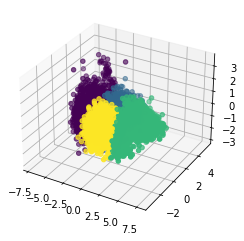

In [39]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [40]:
num=0
pca_2=pd.DataFrame(columns=['PC 1', 'PC 2', "PC 3", "PC 4", "Cluster", "State"])
for index, row in pca_data.iterrows():
    if num%15==0:
        pca_2=pca_2.append({"PC 1": row["PC 1"],"PC 2": row["PC 2"],"PC 3": row["PC 3"],"PC 4": row["PC 4"],"Cluster": row["Cluster"],"State": row["State"] }, ignore_index=True)
    num+=1
pca_2.head


<bound method NDFrame.head of           PC 1      PC 2      PC 3      PC 4 Cluster    State
0    -0.359170  0.519800 -0.256430  0.059909       1  Alabama
1    -2.210203 -0.984251 -0.038893  0.231886       0  Alabama
2    -2.484740 -0.911986  0.329364 -0.100548       0  Alabama
3    -1.805481  0.366894 -0.210200 -0.126147       0  Alabama
4    -4.734054 -0.266076 -0.601543  0.205837       0  Alabama
...        ...       ...       ...       ...     ...      ...
1547 -0.245921  0.536603  0.391354  0.474193       1  Wyoming
1548 -1.771241  0.888384  0.419260  0.569845       0  Wyoming
1549 -0.725743 -0.070921 -0.111363 -0.363556       1  Wyoming
1550 -2.034673  0.501399 -0.313572 -0.409418       0  Wyoming
1551 -2.739831  1.277829  1.123898  1.226472       0  Wyoming

[1552 rows x 6 columns]>

In [41]:
pca_2

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-0.359170,0.519800,-0.256430,0.059909,1,Alabama
1,-2.210203,-0.984251,-0.038893,0.231886,0,Alabama
2,-2.484740,-0.911986,0.329364,-0.100548,0,Alabama
3,-1.805481,0.366894,-0.210200,-0.126147,0,Alabama
4,-4.734054,-0.266076,-0.601543,0.205837,0,Alabama
...,...,...,...,...,...,...
1547,-0.245921,0.536603,0.391354,0.474193,1,Wyoming
1548,-1.771241,0.888384,0.419260,0.569845,0,Wyoming
1549,-0.725743,-0.070921,-0.111363,-0.363556,1,Wyoming
1550,-2.034673,0.501399,-0.313572,-0.409418,0,Wyoming


In [42]:
clusters_and_their_states.values()

dict_values([['Arizona', 'Colorado', 'Delaware', 'Illinois', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Nebraska', 'New Hampshire', 'New Mexico', 'North Carolina', 'Ohio', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], ['California', 'Connecticut', 'District of Columbia', 'Hawaii', 'Maryland', 'Massachusetts', 'Michigan', 'Nevada', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'], ['Florida'], [], ['Alabama', 'Alaska', 'Arkansas', 'Georgia', 'Idaho', 'Indiana', 'Kansas', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'North Dakota', 'Oklahoma', 'Oregon', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Wyoming']])

In [43]:
# vals=list(clusters_and_their_states.values())
# keys=list(clusters_and_their_states.keys())
# for index, row in pca_2.iterrows():
#     for i in range(len(vals)):
#         if row["State"] in vals[i]:
#             pca_2.at[index, "Cluster"]= keys[i]
# pca_2
            
            
    

In [44]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['PC 4']+6)*2

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["PC 1"],
                    y=pca_2["PC 2"],
                    z=pca_2["PC 3"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Rainbow'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Principal Component 1"),
                                yaxis=dict( title="Principal Component 2"),
                                zaxis=dict(title="Principal Component 3")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("MAY Mobility KMeans.html")
                   )


'MAY Mobility KMeans.html'